<a href="https://colab.research.google.com/github/Sawroyl/L6AI/blob/main/worksheet_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

 Syntax of Conv2D Layer

In [ ]:
from tensorflow.keras.layers import Conv2D
layer = Conv2D(filters, kernel_size, strides=(1,1), padding="valid", activation=None, use_bias=True,
  kernel_initializer="glorot_uniform")

 Syntax of Pooling Layers

In [ ]:
from tensorflow.keras.layers import MaxPooling2D, AveragePooling2D
max_pool = MaxPooling2D(pool_size=(2,2), strides=None, padding="valid")
avg_pool = AveragePooling2D(pool_size=(2,2), strides=None, padding="valid")

 **1. Model Compilation:** <br> Keras will then prepare the model for the forward and backward propagation steps

In [ ]:
model.compile(optimizer='SGD', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

**2. Model Training:** <br>  Training the Model

In [ ]:
model.fit(train_ds, epochs=10, validation_data=val_ds)

<b> 6 Simple CNN Implemented using Keras </b> <br> End-to-End CNN Model

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import numpy as np
 #Loadasample dataset(MNISTforsimplicity)
(x_train,y_train),(x_test,y_test)=keras.datasets.mnist.load_data()
 #Normalizeand reshapedata
x_train=  x_train.astype("float32")/255.0
x_test=x_test.astype("float32")/255.0
x_train=np.expand_dims(x_train,axis=-1)#Addchanneldimension
x_test=np.expand_dims(x_test,axis=-1)
 #Defineasimple CNNmodel
model =keras.Sequential([
  layers.Conv2D(32,(3,3),activation="relu",input_shape=(28,28,1)),
  layers.MaxPooling2D((2,2)),
  layers.Conv2D(64,(3,3),activation="relu"),
  layers.MaxPooling2D((2,2)),
  layers.Flatten(),
  layers.Dense(128,activation="relu"),
  layers.Dense(10,activation="softmax")#10classesforMNISTdigits
 ])
 #Compilethemodel
model.compile(optimizer="adam",
  loss="sparse_categorical_crossentropy",
  metrics=["accuracy"])
 #Trainthemodel
model.fit(x_train,y_train,epochs=5,batch_size=32,validation_data=(x_test,y_test))
 #Evaluatethemodel
test_loss,test_acc=model.evaluate(x_test,y_test)
print(f"Testaccuracy:{test_acc:.4f}")
 #Makepredictions
predictions=model.predict(x_test[:5])
predicted_labels =np.argmax(predictions,axis=1)
print("Predictedlabels:",predicted_labels)
print("Actuallabels:",y_test[:5])

Breaking Down CNN's each layer:

 1. Input Layer:

In [ ]:
input_shape=(28,28,1)

2. First Convolutional Layer:

In [ ]:
layers.Conv2D(32,(3,3),activation="relu",input_shape=(28,28,1)),

 3. First Pooling Layer:

In [ ]:
layers.MaxPooling2D((2, 2)),

 4. Second Convolutional Layer:

In [ ]:
layers.Conv2D(32, (3, 3), activation="relu", input_shape=(28, 28, 1)),

 5. Second Pooling Layer:

In [ ]:
layers.MaxPooling2D((2, 2)),

6. Flatten Layer:

In [ ]:
layers.Flatten(),

 7. Fully Connected Dense Layer:

In [ ]:
layers.Dense(128, activation="relu"),

8. Output Layer:

In [ ]:
layers.Dense(10, activation="softmax") # 10 classes for MNIST digits

 Final Model Summary:

In [ ]:
model.summary()

 <b>7 Exercise. <br> Implement an End to End CNN Model for Image Classification Task

 Build and train a Convolutional Neural Network to classify fruits in Amazon
 using TensorFlow and Keras

<b> Task 1: Data Understanding and Visualization:

1. Load and visualize images from a dataset stored in directories, where each subdirec
tory represents a class.

In [3]:
# import tensorflow as tf
# from tensorflow import keras
# from tensorflow import layers
# import numpy as np

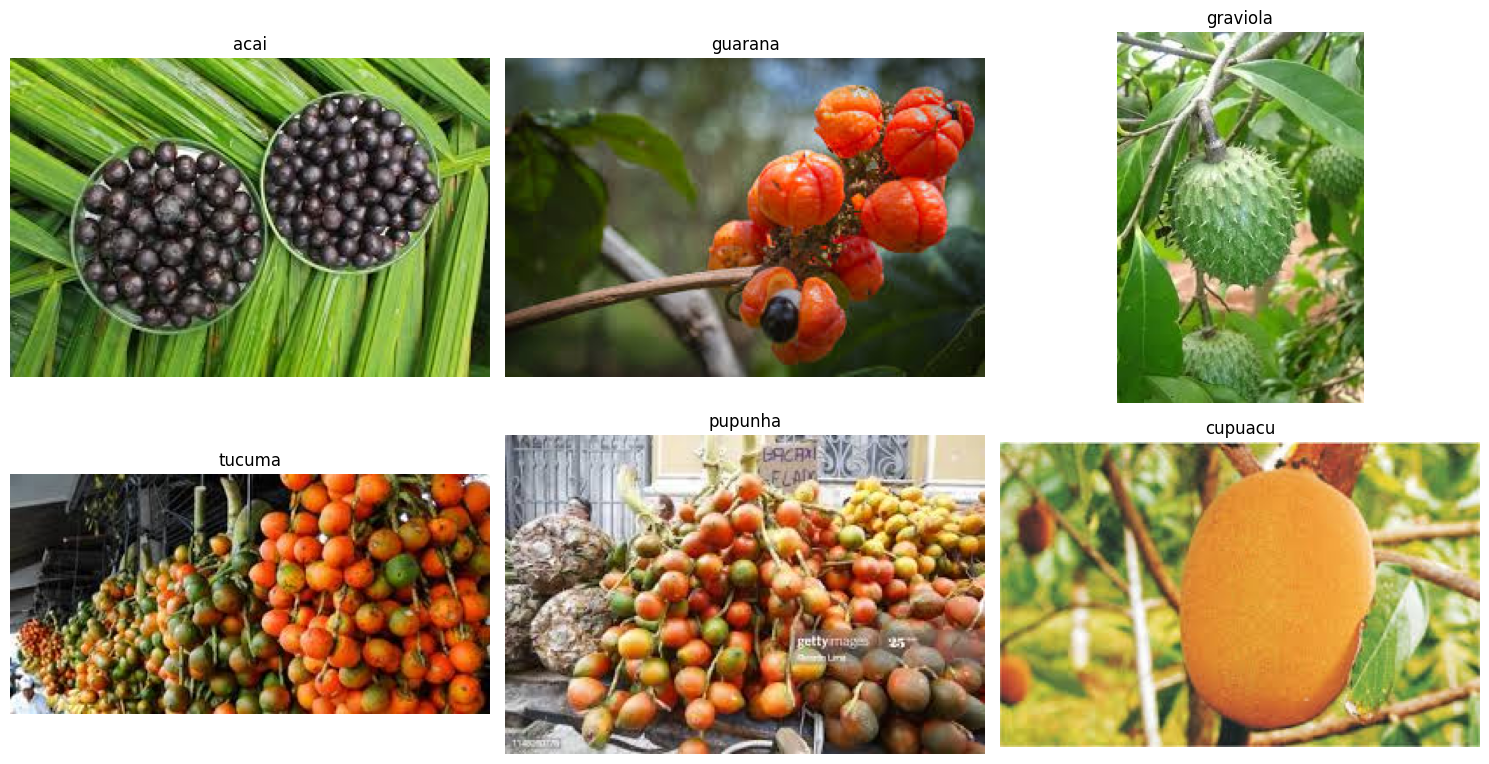

In [46]:
import os
import random
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from pathlib import Path

# Set the path to 'train' folder
train_folder = '/content/drive/MyDrive/AI And ML/FruitinAmazon/train'

# Get the list of class directories in the 'train' folder
class_dirs = [f.name for f in Path(train_folder).iterdir() if f.is_dir()]

# Select one image randomly from each class directory
images = []
for class_dir in class_dirs:
    class_folder = os.path.join(train_folder, class_dir)
    image_files = [f for f in os.listdir(class_folder) if f.endswith(('.png', '.jpg', '.jpeg'))]
    if image_files:
      random_image = random.choice(image_files)
      images.append(os.path.join(class_folder, random_image))

# Check the number of images selected
num_images = len(images)

# Calculate grid size has two rows
num_columns = (num_images + 1) // 2

# Set up images in a grid format with two rows
fig, axes = plt.subplots(2, num_columns, figsize=(15, 8))

# Flatten axes in case we have a 2D grid
axes = axes.flatten()

# Plot and display the images in grid
for i in range(num_images):
    img = mpimg.imread(images[i])
    axes[i].imshow(img)
    axes[i].axis('off')
    axes[i].set_title(class_dirs[i])
for i in range(num_images, len(axes)):
    axes[i].axis('off')
plt.tight_layout()
plt.show()

 <b>2. Check for Corrupted Image: </b><br> Write a script that verifies whether the image in the train
 directory are valid. If any corrupted images are found, the script must remove the image from
 the directory and print the message which image have been removed, if none found print ”No
 Corrupted Images Found.”

In [47]:
import os
from PIL import Image

def remove_corrupt(dir):
  corrupted = []

  #iterate thru each class subdirectory inside train
  for root, dirs, files in os.walk(dir):

    #skip directories that dont contain image
    for file in files:
      image_path = os.path.join(root, file)

      try:
        with Image.open(image_path) as img:
          img.verify()

      except (IOError, SyntaxError) as e:
        #remove corrupted
        os.remove(image_path)
        corrupted.append(image_path)
        print(f"Corrupted image removed: {image_path}")

  if not corrupted:
    print("No corruptted images found")

train_path = '/content/drive/MyDrive/AI And ML/FruitinAmazon/train'
remove_corrupt(train_path)

No corruptted images found


<b>Task 2: Loading and Preprocessing Image Data in keras:

 Sample Implementation.

In [ ]:
train_ds=tf.keras.preprocessing.image_dataset_from_directory(train_dir,labels='inferred',
 label_mode='int',image_size=(img_height,img_width),interpolation='nearest',batch_size=
 batch_size,shuffle=True,validation_split=validation_split,subset='training',seed=123)

Implementation

In [57]:
import tensorflow as tf
from tensorflow.keras.preprocessing import image_dataset_from_directory

#Define image size and batch size
img_height = 128 #Example image height
img_width = 128 # Example image width
batch_size = 32
validation_split = 0.2 # 80% training, 20% validation

# Define directory paths
fruit_in_amazon_dir = '/content/drive/MyDrive/AI And ML/FruitinAmazon'
train_dir = '/content/drive/MyDrive/AI And ML/FruitinAmazon/train'
test_dir = '/content/drive/MyDrive/AI And ML/FruitinAmazon/test'

# Create a preprocessing layer for normalization
rescale = tf.keras.layers.Rescaling(1./255) # Normalize pixel values to [0,1]

#Create training dataset with normalization
train_ds=tf.keras.preprocessing.image_dataset_from_directory(
  train_dir,
  labels = 'inferred',
  label_mode = 'int',
  image_size=(img_height, img_width),
  interpolation = 'nearest',
  batch_size = batch_size,
  shuffle = True,
  validation_split=validation_split,
  subset='training',
  seed=123
)
# Apply the normalization (Rescaling) to the training dataset
train_ds = train_ds.map(lambda x,y:(rescale(x),y)) # Normalize pixel values

# Create validation dataset with normalization
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  train_dir,
  labels = 'inferred',
  label_mode = 'int',
  image_size = (img_height, img_width),
  interpolation = 'nearest',
  batch_size = batch_size,
  shuffle = False,
  validation_split = validation_split,
  subset = 'validation',
  seed=123
)
# Apply the normalization(Rescaling) to the validation dataset
val_ds = val_ds.map(lambda x,y:(rescale(x),y)) # Normalize pixel values
print(f"Training dataset: {train_ds}")
print(f"Validation dataset: {val_ds}")

# Create the test dataset with normalization
test_ds = image_dataset_from_directory(
  test_dir,
  labels = 'inferred',
  label_mode = 'int',
  image_size = (img_height, img_width),
  interpolation = 'nearest',
  batch_size = batch_size,
  shuffle = False,
  seed = 123
)
# Get class names from the dataset
class_names = test_ds.class_names

test_ds = test_ds.map(lambda x, y: (rescale(x), y))  # Normalize the test dataset



Found 90 files belonging to 6 classes.
Using 72 files for training.
Found 90 files belonging to 6 classes.
Using 18 files for validation.
Training dataset: <_MapDataset element_spec=(TensorSpec(shape=(None, 128, 128, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>
Validation dataset: <_MapDataset element_spec=(TensorSpec(shape=(None, 128, 128, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>
Found 30 files belonging to 6 classes.


<b>Task 3- Implement a CNN with

Convolutional Architecture <br> Fully Connected Network Architecture

In [58]:
num_classes = 6

# Create a Sequential Model
model = tf.keras.Sequential([
    # Convolutional Layer1
    tf.keras.layers.Conv2D(32, (3, 3), padding='same', strides=1, activation='relu', input_shape=(img_height, img_width, 3)),
    # Pooling Layer1
    tf.keras.layers.MaxPooling2D((2, 2), strides=2),

    # Convolutional Layer2
    tf.keras.layers.Conv2D(32, (3, 3), padding='same', strides=1, activation='relu'),
    # Pooling Layer2
    tf.keras.layers.MaxPooling2D((2, 2), strides=2),

    # Flatten the output to send into FCL
    tf.keras.layers.Flatten(),

    # Hidden Fully Connected Layer1
    tf.keras.layers.Dense( 64, activation='relu'),
    # Hidden Fully Connected Layer2
    tf.keras.layers.Dense( 128, activation='relu'),

    # Output Layer (Numver of neurons = no.classes i.e 6 )
    tf.keras.layers.Dense(num_classes, activation='softmax')

])

model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_8 (Conv2D)                    │ (None, 128, 128, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_8 (MaxPooling2D)       │ (None, 64, 64, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_9 (Conv2D)                    │ (None, 64, 64, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_9 (MaxPooling2D)       │ (None, 32, 32, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_4 (Flatten)                  │ (None, 32768)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_12 (Dense)                     │ (None, 64)                  │       2,097,216 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_13 (Dense)                     │ (None, 128)                 │           8,320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_14 (Dense)                     │ (None, 6)                   │             774 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,116,454 (8.07 MB)

 Trainable params: 2,116,454 (8.07 MB)

 Non-trainable params: 0 (0.00 B)

<b>Task 4: Compile the Model

optimizer: Adam, loss function: sparse categorical crossentropy, evaluation metric: accuracy

<b>Task 4: Compile the Model

model.fit() {batch size: 60, epochs: 250} to train<br> val.ds for validation <br> Callbacks: ModelCheckpoint or EarlyStopping

In [59]:
# Compile the model
model.compile(optimizer='adam',
  loss='sparse_categorical_crossentropy',
  metrics=['accuracy']
)

<b>Training the Model

In [60]:
history = model.fit(
    train_ds,  # Training data
    validation_data = val_ds,  # Validation data
    epochs=10,  # Number of epochs
    batch_size = batch_size
)

Epoch 1/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 5s 551ms/step - accuracy: 0.1250 - loss: 2.2376 - val_accuracy: 0.0000e+00 - val_loss: 1.6583
Epoch 2/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 469ms/step - accuracy: 0.2049 - loss: 1.8383 - val_accuracy: 0.8333 - val_loss: 1.3302
Epoch 3/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 476ms/step - accuracy: 0.2148 - loss: 1.7421 - val_accuracy: 0.3889 - val_loss: 1.6476
Epoch 4/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 537ms/step - accuracy: 0.5087 - loss: 1.6058 - val_accuracy: 0.4444 - val_loss: 1.5475
Epoch 5/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 543ms/step - accuracy: 0.3516 - loss: 1.4873 - val_accuracy: 0.7778 - val_loss: 1.0620
Epoch 6/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 792ms/step - accuracy: 0.4015 - loss: 1.3446 - val_accuracy: 0.7778 - val_loss: 1.0511
Epoch 7/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 4s 535ms/step - accuracy: 0.6428 - loss: 1.0966 - val_accuracy: 0.3333 - val_loss: 1.4395
Epoch 8/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 452ms/step - accuracy: 0.8012 - loss: 0.9720 - val_accuracy: 0.6667 - val_l

<b> Task 5: Evaluate the Model

model.evaluate()

In [61]:
# Evaluate the model on the test data
test_loss, test_acc = model.evaluate(test_ds)
print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_acc}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 533ms/step - accuracy: 0.4333 - loss: 1.2678
Test Loss: 1.2678108215332031
Test Accuracy: 0.4333333373069763


<b> Task 6: Save and Load the Model

model.save()

In [62]:
# Save the trained model to a h5 file
model.save('fruit_classification_model.h5')
print("Model saved as 'fruit_classification_model.h5'")

Model saved as 'fruit_classification_model.h5'


In [63]:
from tensorflow.keras.models import load_model

# Load the saved model to demonstrate loading it again
loaded_model = load_model('fruit_classification_model.h5')
print("Model loaded from 'fruit_classification_model.h5'")

test_loss, test_acc = loaded_model.evaluate(test_ds)
print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_acc}")

Model loaded from 'fruit_classification_model.h5'
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 646ms/step - accuracy: 0.4333 - loss: 1.2678
Test Loss: 1.2678108215332031
Test Accuracy: 0.4333333373069763


<b>  Task 7: Predictions and Classification Report

In [ ]:
model.predict()
#Convert the model's predicted probabilities to digit labels
np.argmax()

In [64]:
import tensorflow as tf
from tensorflow.keras.models import load_model
import numpy as np

# Make predictions on the test dataset
y_pred = []
y_true = []
# Loop over the test dataset
for images, labels in test_ds:
    predictions = loaded_model.predict(images)
    y_pred.extend(np.argmax(predictions, axis=1))  # Get the predicted class labels
    y_true.extend(labels.numpy()) # True class labels

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 409ms/step


In [65]:
# Report of your Model Performance.
from sklearn.metrics import classification_report

# Make the classification report
print("\nClassification Report:")
print(classification_report(y_true, y_pred, target_names=class_names))

test_loss, test_acc = loaded_model.evaluate(test_ds)
print(f"\nTest Loss: {test_loss}")
print(f"Test Accuracy: {test_acc}")


Classification Report:
              precision    recall  f1-score   support

        acai       0.50      0.60      0.55         5
     cupuacu       0.36      1.00      0.53         5
    graviola       0.00      0.00      0.00         5
     guarana       0.50      0.20      0.29         5
     pupunha       0.50      0.80      0.62         5
      tucuma       0.00      0.00      0.00         5

    accuracy                           0.43        30
   macro avg       0.31      0.43      0.33        30
weighted avg       0.31      0.43      0.33        30



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 333ms/step - accuracy: 0.4333 - loss: 1.2678

Test Loss: 1.2678108215332031
Test Accuracy: 0.4333333373069763


Expected Deliverables <br>
 • Code Implementation: Complete code for building, training, evaluating, saving, and loading
 the model. <br>
 • Visualization: Graphs showing the training and validation loss and accuracy.<br>
 • Classification Report: Display the final Classification Report on test data.<br>
 • Saved Model: Submit the saved .h5 model file.